<a href="https://colab.research.google.com/github/john-sedrak/ML-CV-Project/blob/main/DS_ML_Project_Day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#<center> DS ML Capstone Project: Celebrity Face Recognition


##### <center>Original work: [Sports Celebrity Image Classification — codebasics](https://youtube.com/playlist?list=PLeo1K3hjS3uvaRHZLl-jLovIjBP14QTXc)
##### <center> Prepared by: Ahmed Mokhtar

---

You have all been waiting for this! It is what the sessions prepared you for in the past 2 semesters. ML modeling! In this notebook, you will experiment with the different ML algorithms we have taken throughout our plan. Moreover, We will evaluate our models using different metrics. Finally, we will tune the algorithms's hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

If you are storing your data on google drive, mount your drive from here.

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


Otherwise, you can import the pre-made dataset from here.

In [6]:
import shutil
from os import path

if path.exists('./dataset-ready'):
    shutil.rmtree('./dataset-ready')

if path.exists('./dataset-cropped'):
    shutil.rmtree('./dataset-cropped')

if path.exists('./dataset'):
    shutil.rmtree('./dataset')

!git clone https://github.com/IEEE-GUC-DS/dataset-ready.git

shutil.move("/content/dataset-ready/final_data.pkl", "/content/final_data.pkl")
shutil.rmtree('./dataset-ready')

Cloning into 'dataset-ready'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 1), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (8/8), done.


Load your dataset and labels using the code below. Change the path to your dataset's path.

In [7]:
import pickle

# Getting back the dataset:
with open('./drive/MyDrive/datasets/final_data.pkl', 'rb') as f:
    X, y, label_lookup = pickle.load(f)

print(f"X shape: {X.shape}\ny shape: {y.shape}\n\nlabels: {label_lookup}")

X shape: (140, 4096)
y shape: (140,)

labels: {0: 'natalie_portman', 1: 'ed_sheeran', 2: 'lionel_messi', 3: 'terry_crews', 4: 'jennifer_aniston'}


## Part V: Modeling and Evaluation

Follow along with this video as you solve the notebook: [Data Science & Machine Learning Project - Part 5 Training a Model | Image Classification](https://www.youtube.com/watch?v=5Uc_m9CRWro&list=PLeo1K3hjS3uvaRHZLl-jLovIjBP14QTXc&index=5).<br><br>

We will begin by training simple models on our dataset. We will use the same models you learned during the sessions.

<mark>Task: Import any libraries you will need. This includes all the models you want to try, train/test split, GridSearchCV, etc.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import numpy as np

Run the following code to guarantee reproducable results.

In [9]:
np.random.seed(7)

<mark>Task: Split your data to train and test sets. Set the ratios according to your intuition. The test set is 25% by default

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

<mark>Question: Which of the algorithms we have taken thus far requires the data to be scaled?

Answer: LR, KNN, SVM

<mark>Task: Train the following classifiers on your data. Scale the data when needed. Do not tune the hyperparameters for now. 

1.  <mark> Logistic Regression (LR)
2.  <mark> Decision Tree (DT)
3.  <mark> K-Nearest Neighbours (KNN)
4.  <mark> Support Vector Machine (SVM)<br>

 <mark> Get the score of your model on the test set afterwards.

Tip: Look into the [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) function to facilitate scaling before fitting.

### Logistic Regression (LR)

In [11]:
LR_pipe = Pipeline([('scaler', MinMaxScaler()),('lr',LogisticRegression())])

LR_pipe.fit(x_train, y_train)
LR_pipe.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8571428571428571

### K-Nearest Neighbours (KNN)

In [12]:
KNN_pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

KNN_pipe.fit(x_train, y_train)
KNN_pipe.score(x_test, y_test)

0.7428571428571429

### Decision Tree (DT)

In [13]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT.score(x_test, y_test)

0.5428571428571428

### Support Vector Machine (SVM)

In [14]:
SVC_pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC())])

SVC_pipe.fit(x_train, y_train)
SVC_pipe.score(x_test, y_test)

0.7428571428571429

### Linear Discriminant Analysis (LDA)

In [15]:
LDA_pipe = Pipeline([('scaler', MinMaxScaler()), ('lda', LinearDiscriminantAnalysis(n_components=4))])

LDA_pipe.fit(x_train, y_train)
LDA_pipe.score(x_test, y_test)

0.8285714285714286

### Random Forest Classifier (RF)

In [16]:
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
RF.score(x_test, y_test)

0.7142857142857143

<mark> Question: Which model had the best score?

Answer: LR

### Evaluation using other Metrics

Read the following article to get an understanding of precision, recall, and f1-score: [Precision vs. Recall – An Intuitive Guide for Every Machine Learning Person](https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/).


<mark>Task: Use the *classification_report* function on your logistic regression model to find the precision, recall, and f1-score.

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_pred = LR_pipe.predict(x_test), y_true = y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.86      0.86      0.86         7
           2       1.00      0.80      0.89         5
           3       0.75      0.75      0.75         4
           4       0.82      1.00      0.90         9

    accuracy                           0.86        35
   macro avg       0.86      0.84      0.85        35
weighted avg       0.86      0.86      0.86        35



<mark> Question: what did you get from the metrics above?

Answer: Logistic regression performed well despite the unbalanced dataset.

### Hyperparameter Tuning

<mark>Task: Use GridSearchCV to find the best hyperparameters for the 4 algorithms above. Use 5-fold cross validation to evaluate your GridSearchCV models.

First, specify your models and parameters.

In [26]:
lr = LogisticRegression(max_iter = 500)
lr_params = {'penalty': ['none','l2'], 'C': [0.01, 0.1, 1, 10]}

knn = KNeighborsClassifier()
knn_params = {"n_neighbors": [5,10,15,20,25,30,40,50],  }

dt = DecisionTreeClassifier()
dt_params = {"min_impurity_decrease": [0.0,0.1,0.2,0.3]}

svm = SVC()
svm_params = {"kernel": ['rbf','linear'], 'C': [0.01,0.1,1,10], }

Next, we will use GridSearchCV to train the models. We will loop on all the algorithms, find the best model through 5-fold cross validation, and save the best estimators along with their score.

In [ ]:
from sklearn.model_selection import GridSearchCV
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

lr_grid = GridSearchCV(lr, lr_params, cv=5)
knn_grid = GridSearchCV(knn, knn_params, cv=5)
dt_grid = GridSearchCV(dt, dt_params, cv=5)
svm_grid = GridSearchCV(svm, svm_params, cv=5)

lr_grid.fit(x_train, y_train, )
knn_grid.fit(x_train, y_train, )
dt_grid.fit(x_train, y_train,)
svm_grid.fit(x_train, y_train,)

### Further Evaluation

<mark>Task: Use *classification_report* to evaluate the 4 best models we have.

### Logistic Regression (LR)

In [35]:
lr_pred = lr_grid.predict(x_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.83      0.71      0.77         7
           2       1.00      0.80      0.89         5
           3       0.75      0.75      0.75         4
           4       0.82      1.00      0.90         9

    accuracy                           0.83        35
   macro avg       0.84      0.81      0.82        35
weighted avg       0.83      0.83      0.83        35



### K-Nearest Neighbours (KNN)

In [36]:
knn_pred = knn_grid.predict(x_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.75      0.43      0.55         7
           2       0.80      0.80      0.80         5
           3       0.80      1.00      0.89         4
           4       0.69      1.00      0.82         9

    accuracy                           0.74        35
   macro avg       0.76      0.77      0.74        35
weighted avg       0.75      0.74      0.73        35



### Decision Tree (DT)

In [37]:
dt_pred = dt_grid.predict(x_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.33      0.14      0.20         7
           2       0.67      0.40      0.50         5
           3       1.00      1.00      1.00         4
           4       0.62      0.89      0.73         9

    accuracy                           0.66        35
   macro avg       0.66      0.65      0.63        35
weighted avg       0.62      0.66      0.62        35



### Support Vector Machine (SVM)

In [39]:
svm_pred = svm_grid.predict(x_test)
print(classification_report(y_test, svm_pred))
print(svm_grid.best_params_)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.83      0.71      0.77         7
           2       1.00      0.80      0.89         5
           3       0.75      0.75      0.75         4
           4       0.82      1.00      0.90         9

    accuracy                           0.83        35
   macro avg       0.84      0.81      0.82        35
weighted avg       0.83      0.83      0.83        35

{'C': 0.01, 'kernel': 'linear'}


<mark> Task: Assign the best performing model (in your opinion) to a variable called *best_clf*.

In [40]:
best_clf = svm_grid.best_estimator_

<mark> Task: Get the confusion matrix of your chosen model when applied to the test set, then display it as a heat map and inspect it.

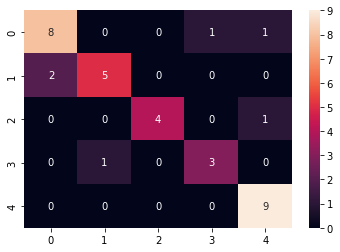

In [43]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

heatmap(confusion_matrix(y_test, best_clf.predict(x_test)), annot=True)

With that, we conclude our modeling end evaluation process. We created a decent model to deploy in production. The final step is to save our model!

We will be using [joblib.dump](https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html) to save our mode because it is faster when dealing with numpy arrays. Models in general use numpy arrays to save parameters, and models like SVMs or K-nearest neighbours store parts of the dataset as well.  

<mark>Task: Use joblib to Save your model!

In [46]:
from joblib import dump

final_scaler = MinMaxScaler()
final_model = best_clf

final_scaler.fit_transform(X)
final_model.fit(X,y)

dump(final_scaler, 'scaler.joblib')
dump(final_model, 'classifier.joblib')

['classifier.joblib']

With our model saved, we can say that we have officially created a face recognition model! This is exciting and you should be proud of yourself! In the remaining notebooks, we will tackle deployment. We will deploy our model using [flask](https://flask.palletsprojects.com/en/2.0.x/) and [AWS](https://aws.amazon.com). 

Rock on!! <font color="red">♥</font>‿<font color="red">♥</font>

<center><img src="https://i.imgur.com/l5Yr3vV.png" width="30%">